In [19]:
from wavelets.usketch import usketch
from howplot.mplot import *
from reader.csvreader import CsvReader
import matplotlib.pyplot as plt
import numpy as np

TRACE = 'data/fat4-WebSearch_distribution-0.12sms-0.25load.json'


Load 1 flows from data/csv/udp_1f_onoff_1s_wid.csv


10, 5, 9, 5, 16, 19, 17, 9, 8, 8, 9, 10, 6, 10, 9, 6, 10, 8, 10, 9, 10, 8, 10, 9, 8, 9, 8, 10, 6, 10, 10, 9, 9, 8, 9, 8, 11, 8, 9, 8, 10, 8, 9, 9, 9, 13, 9, 9, 9, 10, 9, 8, 9, 6, 10, 6, 12, 4, 11, 10, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 8, 10, 8, 10, 9, 12, 4, 14, 4, 11, 13, 20, 17, 11, 9, 8, 12, 5, 13, 6, 12, 6, 12, 9, 10, 10, 9, 10, 10, 8, 11, 10, 9, 9, 10, 9, 9, 11, 9, 11, 8, 13, 4, 12, 8, 12, 8, 9, 11, 8, 12, 4, 17, 3, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 12, 12, 14, 10, 12, 12, 11, 10, 9, 13, 10, 11, 11, 13, 10, 13, 18, 8, 14, 9, 12, 12, 13, 14, 6, 11, 13, 10, 13, 12, 12, 11, 10, 12, 12, 11, 11, 12, 10, 14, 10, 14, 11, 11, 11, 10, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

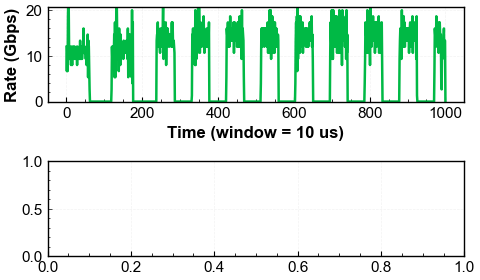

In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from wavelets.error import euclidean_distance
import json

COMPRESSION_RATIO = 1

# create the figure and axes outside of the function
waver = WaveletCompression(COMPRESSION_RATIO, wavelet='haar', level=5)

def plot_flow(flow_id):
    # clear the previous figure
    counters = csv.get_counters(flow_id)      # an array of wid counters
    RANGE_L = 0
    RANGE_R = 1000
    signal = [0] * (RANGE_R - RANGE_L + 1)
    wid_base = counters[0][0]
    for idx,_ in enumerate(counters):
        offset = counters[idx][0] - wid_base
        if RANGE_L <= offset and offset < RANGE_R:
            signal[offset - RANGE_L] = counters[idx][2] * 8 / 0.00001 / 1e9
        elif offset >= RANGE_R:
            break
    # clear plot
    clear_output(wait=True)
    display(input_box)
    for s in signal:
        print(f"{int(s)}", end=", ")
    new_signal = waver.compress_1d(signal)
    
    _, axs = plt.subplots(2, 1, figsize=(5,3))
    axs[0].set_ylim(0, max(signal))
    # axs[0].set_title(f"Flow {flow_id}")
    
    rate = [0] * len(signal)
    for i in range(len(signal)):
        rate[i] = signal[i] * 1448 * 8 / 0.00001 / 1e9
    axs[0].plot(rate)
    axs[0].set_ylabel('Rate (Gbps)')
    axs[0].set_xlabel('Time (window = 10 us)')
    
    # save signal
    # np.savetxt(f"paper/onoff_udp_flow_rate_txt.csv", rate, delimiter=",")
    txtf = open(f"paper/onoff_udp_flow_rate_txt.csv", "w")
    # txtf.write(str(rate))
    json.dump(rate, txtf)
    
    # axs[1].set_ylim(0, max(signal))
    # axs[1].set_title(f"Flow {flow_id}")
    # axs[0].plot(new_signal, color='red')
    
    axs[0].set_ylim(0, max(signal))
    
    # axs[0].set_title(f"Flow {flow_id}")
    # axs[0].plot(new_signal, color='red')
        
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"paper/figs/onoff_flow2.pdf")
    

# 定义查询按钮的回调函数
def on_query_button_clicked(b):
    flow_id = flow_id_input.value
    try:
        # 尝试将输入转换为整数类型的flow_id
        flow_id = int(flow_id)
        if flow_id in keys:
            plot_flow(flow_id)
        else:
            print("Flow ID not found.")
    except ValueError:
        # 如果转换失败，打印错误信息
        print("Please enter a valid Flow ID.")


# initialize the current flow id as a random flow in flows
current_flow_id = 0
keys = list(flow_size.keys())

# 创建一个文本输入框和一个查询按钮
flow_id_input = widgets.Text(
    value='',
    placeholder='Enter Flow ID',
    description='Flow ID:',
    disabled=False
)

query_button = widgets.Button(description="Query Flow")

# 创建一个垂直布局容器来放置输入框和按钮
input_box = widgets.VBox([flow_id_input, query_button])
# 注册查询按钮的回调函数
query_button.on_click(on_query_button_clicked)
# 在界面上显示输入框和查询按钮
display(input_box)